In [52]:
# velo : 1
# voiture : 2    

In [53]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img


In [54]:
debut_lien = 'C:\\Users\\Thibaut guo\\OneDrive\\Bureau\\THEO\\cars_dataset\\train\\Audi\\'
fin_lien = '.jpg'
liste_image = []
for i in range(1000):
    try:
        image = img.imread(debut_lien + str(i) + fin_lien)
        if image.shape == (168,300,3):
            liste_image.append(image)
    except OSError as error:
        pass



In [55]:
len(liste_image)

185

In [56]:
liste_image = np.array(liste_image)
liste_output = np.array([1 for i in range(len(liste_image))])

In [57]:
encoder_input = keras.Input(shape=(168,300,3), name = 'image de voiture')
x0 = keras.layers.Flatten()(encoder_input)
x1 = keras.layers.Dense(1000, activation="relu")(x0)
encoder_output = keras.layers.Dense(1, activation="relu")(x1)

opt = tf.keras.optimizers.Adam(learning_rate=0.001,weight_decay=1e-6)

autoencoder = keras.Model(encoder_input,encoder_output)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image de voiture (InputLay  [(None, 168, 300, 3)]     0         
 er)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 151200)            0         
                                                                 
 dense_11 (Dense)            (None, 1000)              151201000 
                                                                 
 dense_12 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 151202001 (576.79 MB)
Trainable params: 151202001 (576.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
autoencoder.compile(opt,loss='mse')

In [59]:
autoencoder.fit(
    liste_image,
    liste_output,
    epochs=3,
    batch_size=37,
    validation_split=0.10
)

Epoch 1/3
5/5 [==============================] - 13s 2s/step - loss: 4792.8687 - val_loss: 1.0000
Epoch 2/3
5/5 [==============================] - 10s 2s/step - loss: 1.0000 - val_loss: 1.0000
Epoch 3/3
5/5 [==============================] - 11s 2s/step - loss: 1.0000 - val_loss: 1.0000


In [60]:
res = []

for i in range(185):
    res.append(autoencoder.predict(liste_image[i].reshape((-1,168,300,3)))[0])

1/1 [==============================] - 0s 77ms/step


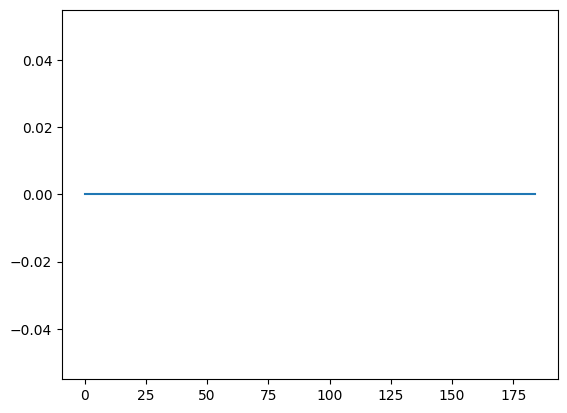

In [61]:
plt.plot(res)
plt.show()